# Bootcamp opdracht dag 7 - Middag

### Imports

In [10]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

### Data

Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [11]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [12]:
print(X_train[:5])
print(y_train[:5])

[list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188, 5165

### Reverse data
Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

### Encoding

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [15]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [16]:
print(X_train)

print(y_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[1. 0. 1. ... 1. 0. 0.]


### Neural Network

Maak een neuraal netwerk dat met deze data overweg kan.

In [55]:
from keras.models import Sequential
from keras.layers import Dense

print(X_train.shape)

model = Sequential()

model.add(Dense(2, input_shape = (10000,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))




(13284, 10000)


Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [56]:
from tensorflow.keras.optimizers import Adam

model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 20002     
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20,005
Trainable params: 20,005
Non-trainable params: 0
_________________________________________________________________


### Split data

Split in train en validatieset

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


## Training & output
Train je model model met de gemaakte train- en validatieset. 

In [58]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
 21/187 [==>...........................] - ETA: 0s - loss: 0.6938 - accuracy: 0.4911

2022-02-15 20:02:28.700288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.4995 - val_loss: 0.6936 - val_accuracy: 0.4725
Epoch 2/10
 11/187 [>.............................] - ETA: 0s - loss: 0.6936 - accuracy: 0.4574

2022-02-15 20:02:29.807616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 5ms/step - loss: 0.5934 - accuracy: 0.6408 - val_loss: 0.3828 - val_accuracy: 0.8608
Epoch 3/10
187/187 [==============================] - 1s 5ms/step - loss: 0.2910 - accuracy: 0.8980 - val_loss: 0.3214 - val_accuracy: 0.8743
Epoch 4/10
187/187 [==============================] - 1s 5ms/step - loss: 0.1682 - accuracy: 0.9497 - val_loss: 0.3610 - val_accuracy: 0.8728
Epoch 5/10
187/187 [==============================] - 1s 5ms/step - loss: 0.1145 - accuracy: 0.9711 - val_loss: 0.3937 - val_accuracy: 0.8721
Epoch 6/10
187/187 [==============================] - 1s 5ms/step - loss: 0.0899 - accuracy: 0.9784 - val_loss: 0.4883 - val_accuracy: 0.8683
Epoch 7/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0769 - accuracy: 0.9832 - val_loss: 0.4809 - val_accuracy: 0.8728
Epoch 8/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0687 - accuracy: 0.9855 - val_loss: 0.5257 - val_accuracy: 0.8683
Epoch 9/10
187/18

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

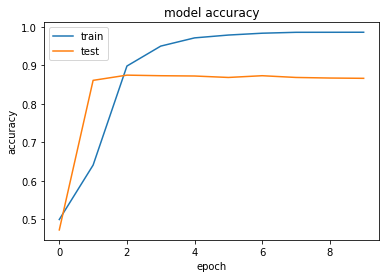

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

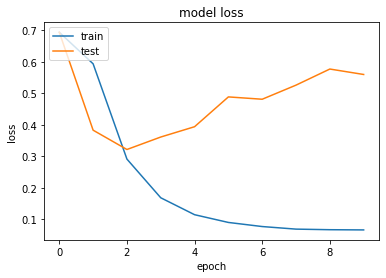

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Test je model

In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

782/782 [==============================] - 3s 3ms/step - loss: 0.6557 - accuracy: 0.8522
0.8522400856018066


Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

### Test 1 - meerdere layers

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 40004     
                                                                 
 dense_20 (Dense)            (None, 2)                 10        
                                                                 
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40,023
Trainable params: 40,023
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 1/94 [..............................] - ETA: 31s - loss: 0.6875 - accuracy: 0.5781

2022-02-15 20:14:16.383058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 11ms/step - loss: 0.4719 - accuracy: 0.8223 - val_loss: 0.3895 - val_accuracy: 0.8698
Epoch 2/10
 9/94 [=>............................] - ETA: 0s - loss: 0.2864 - accuracy: 0.9384

2022-02-15 20:14:17.525686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 7ms/step - loss: 0.2643 - accuracy: 0.9259 - val_loss: 0.3443 - val_accuracy: 0.8706
Epoch 3/10
94/94 [==============================] - 1s 6ms/step - loss: 0.1716 - accuracy: 0.9554 - val_loss: 0.3894 - val_accuracy: 0.8668
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1256 - accuracy: 0.9697 - val_loss: 0.5359 - val_accuracy: 0.8570
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1130 - accuracy: 0.9716 - val_loss: 0.4574 - val_accuracy: 0.8608
Epoch 6/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1118 - accuracy: 0.9693 - val_loss: 0.5360 - val_accuracy: 0.8616
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0966 - accuracy: 0.9755 - val_loss: 0.5708 - val_accuracy: 0.8713
Epoch 8/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0808 - accuracy: 0.9812 - val_loss: 0.6835 - val_accuracy: 0.8721
Epoch 9/10
94/94 [=============

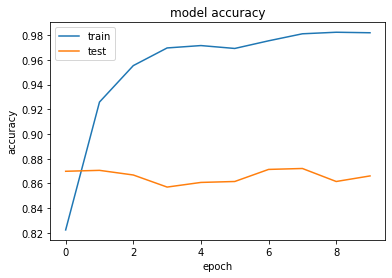

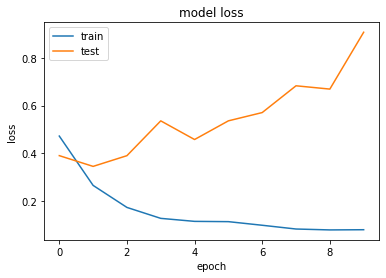

In [62]:
model = Sequential()

model.add(Dense(4, input_shape = (10000,), activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test 2 - Andere loss functie (Verslechterd resultaat)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 4)                 40004     
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 40,009
Trainable params: 40,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 17/187 [=>............................] - ETA: 1s - loss: 0.0000e+00 - accuracy: 0.5101

2022-02-15 20:34:37.918305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5042 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 2/10
  9/187 [>.............................] - ETA: 1s - loss: 0.0000e+00 - accuracy: 0.5017

2022-02-15 20:34:39.238809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 3/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 4/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 5/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 6/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 7/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_loss: 0.0000e+00 - val_accuracy: 0.4725
Epoch 8/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5044 - val_l

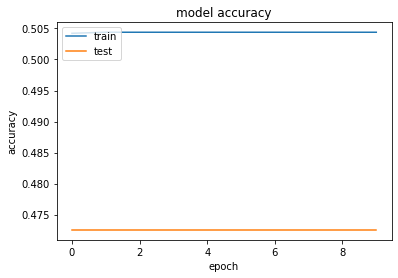

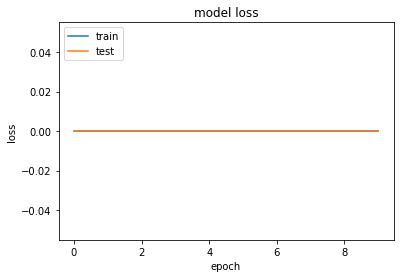

In [67]:
model = Sequential()

model.add(Dense(4, input_shape = [10000], activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test 3 - aantal neuronen vergroten & meerdere layers (overfitting)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 300)               3000300   
                                                                 
 dense_34 (Dense)            (None, 1)                 301       
                                                                 
Total params: 3,000,601
Trainable params: 3,000,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
  8/187 [>.............................] - ETA: 1s - loss: 0.7903 - accuracy: 0.6250 

2022-02-15 20:35:11.335242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 2s 8ms/step - loss: 0.3509 - accuracy: 0.8479 - val_loss: 0.3141 - val_accuracy: 0.8721
Epoch 2/10
  9/187 [>.............................] - ETA: 1s - loss: 0.1193 - accuracy: 0.9618

2022-02-15 20:35:12.731348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 6ms/step - loss: 0.1187 - accuracy: 0.9552 - val_loss: 0.3743 - val_accuracy: 0.8728
Epoch 3/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0408 - accuracy: 0.9860 - val_loss: 0.7158 - val_accuracy: 0.8503
Epoch 4/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.8200 - val_accuracy: 0.8570
Epoch 5/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.9217 - val_accuracy: 0.8533
Epoch 6/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0196 - accuracy: 0.9930 - val_loss: 0.8915 - val_accuracy: 0.8631
Epoch 7/10
187/187 [==============================] - 1s 6ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 1.1611 - val_accuracy: 0.8450
Epoch 8/10
187/187 [==============================] - 1s 7ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 1.1934 - val_accuracy: 0.8593
Epoch 9/10
187/18

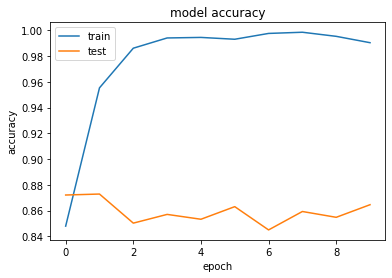

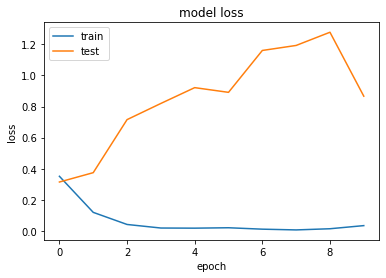

In [68]:
model = Sequential()

model.add(Dense(300, input_shape = [10000], activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Dropout layer
Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?

Dropout is een techniek waarbij willekeurig geselecteerde neuronen tijdens de training worden genegeerd. Ze worden willekeurig "uitgevallen". Dit betekent dat hun bijdrage aan de activering van stroomafwaartse neuronen tijdelijk wordt verwijderd bij de voorwaartse doorgang en dat eventuele gewichtsupdates niet worden toegepast op de neuron bij de achterwaartse doorgang.

In [ ]:
model = Sequential()

model.add(Dense(2, input_shape = (10000,), activation = 'relu'))
model.add(layers.Dropout(.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 2)                 20002     
                                                                 
 dropout_5 (Dropout)         (None, 2)                 0         
                                                                 
 dense_46 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20,005
Trainable params: 20,005
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
  9/187 [>.............................] - ETA: 1s - loss: 0.6974 - accuracy: 0.5017 

2022-02-15 20:41:26.072535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 6ms/step - loss: 0.6253 - accuracy: 0.6223 - val_loss: 0.4873 - val_accuracy: 0.8548
Epoch 2/10
 11/187 [>.............................] - ETA: 0s - loss: 0.5824 - accuracy: 0.6875

2022-02-15 20:41:27.235747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/187 [========================>.....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7306

# Evaluatie

Deeplearning is niet als makkelijk als gedacht. Je hebt veel vrijheid met hoe je dingen aanpakt in vergelijking met machine learning. Zo heb ik geleerd dat de optimer functie, aantal epochs, aantal layers en het aantal neuronen o.a. een invloed hebben op de accuracy.

Toch heb ik er van genoten. Het zit ingewikkeld in elkaar, zoals backpropagation enzo, maar ik kijk ernaar uit om dit allemaal te leren.